In [1]:
import numpy as np
import scipy.stats as sps
from scipy import integrate
from scipy.special import fresnel
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numba import njit, int32, float32

sns.set_theme(style="white", palette=None)

In [2]:
def normalize(array):
    max = np.max(array)
    return array/max

def draw(field, name = '', xlabel = 'x', ylabel = 'y'): # функция для отрисовки экрана, даем на вход массив яркостей(Е^2)
    field = normalize(field)
    field = np.array([field[0] for i in range(100)])
    new_field = (np.dstack((field, field, field))*255).astype(int)
    plt.imshow(new_field)
    plt.title(name)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def delta(x):
    return np.max(x)-np.min(x)

In [3]:
def I(x, k, h):
    S, C = fresnel(x*np.sqrt(k/(2*h)))
    return 1/2 * 1 * ((1/2 + C)**2 + (1/2 + S)**2)

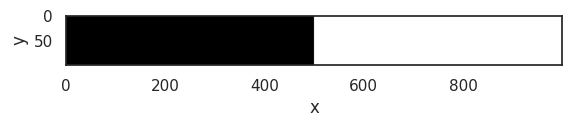

In [4]:
width = 1000
cntr = width//2
delt = width//100

transporant = np.zeros((1, width))
transporant[:, (width)//2:] = 1
draw(transporant)

In [5]:
z = 0.2
screen = np.zeros(transporant.shape)
lambd = 500*10**(-9)
k = 2*np.pi/lambd
scale = 10000
p =np.sqrt(z*lambd)/(width/scale)
p

0.00316227766016838

In [6]:
@njit(fastmath = True)
def calculate(transporant, screen):
    for screen_x in range(screen.shape[1]):
        Im = 0
        Re = 0

        for tr_x in range(transporant.shape[1]):
            dx = (screen_x - tr_x)/scale

            R = np.sqrt(dx**2 + z**2)
            koef = transporant[0][tr_x]/(lambd)

            Im += koef * np.sin(k*R)
            Re += koef * np.cos(k*R)

        screen[0][screen_x] = np.sqrt(Im**2 + Re**2)

    return screen

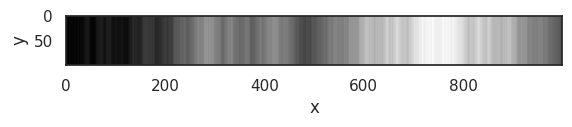

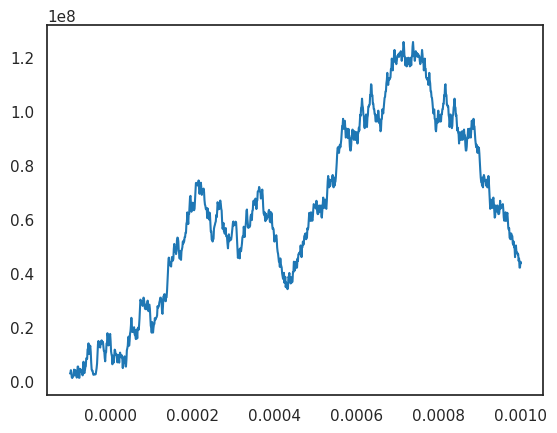

In [8]:
screen = calculate(transporant, screen)
draw(screen)

grid = np.linspace(-0.0001 , 0.001, 1000)
plt.plot(grid, screen[0]) # как получается

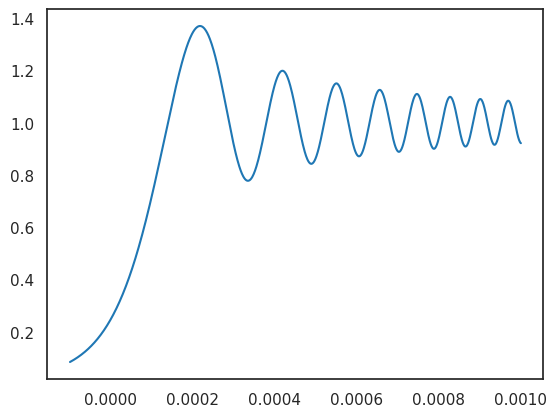

In [9]:
plt.plot(grid, I(grid, k, z)) # как должно быть